In [ ]:
# Mount Google drive
from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import math
import matplotlib.patches as mpatches

In [ ]:
# Connect to your drive folder (you will need the data file saved in your Google Data folder; data can be requested from terence.ow@marquette.edu)
# path = "/content/drive/"
df_MWU_C = pd.read_excel(path)
df_MWU_C.head(3)

,Group,Cue,Stat,Value
0,India,Temp,Points,10
1,India,Temp,Points,10
2,India,Temp,Points,10


In [ ]:
df_MWU_C.rename(columns={"Group": "Region"}, inplace = True)
df_MWU_C.head(3)

,Region,Cue,Stat,Value
0,India,Temp,Points,10
1,India,Temp,Points,10
2,India,Temp,Points,10


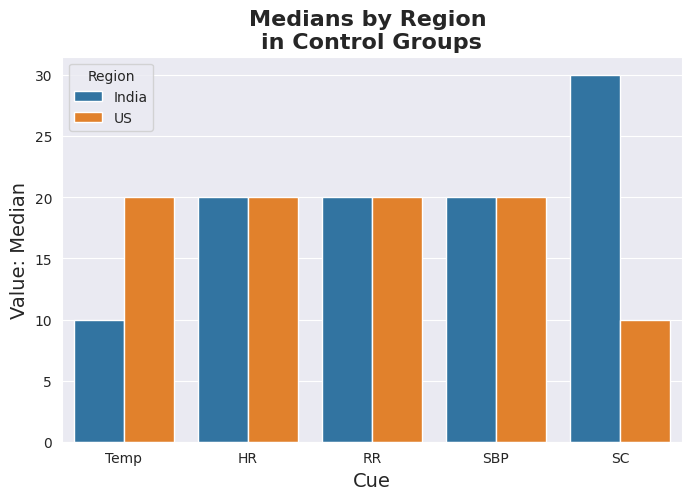

In [ ]:
# Plot the bar chart of the medians by group for each cue.
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
medians_by_group = df_MWU_C.groupby(['Cue', 'Region'])['Value'].median().reset_index()
order = ["Temp", "HR", "RR", "SBP", "SC"]
# std_dev_by_group = df_MWU_C.groupby(['Cue', 'Group'])['Value'].std().reset_index()

# Add standard deviation annotations
# for bar, std_dev in zip(ax.containers, std_dev_by_group['Value']):
#     # Get the x and y coordinates of the bar
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height()

    # Annotate with standard deviation
    # ax.text(x, y + std_dev + 1, f"SD: {std_dev:.2f}", ha='center', va='bottom', fontsize=10)

ax = sns.barplot(x="Cue", y="Value", hue="Region", data = medians_by_group, palette="tab10", order = order)
ax.set_title("Medians by Region \nin Control Groups", fontsize=16, fontweight='bold')
ax.set_xlabel("Cue", fontsize=14)
ax.set_ylabel("Value: Median", fontsize=14)

plt.show()


In [ ]:
medians_by_group

,Cue,Region,Value
0,HR,India,20.0
1,HR,US,20.0
2,RR,India,20.0
3,RR,US,20.0
4,SBP,India,20.0
5,SBP,US,20.0
6,SC,India,30.0
7,SC,US,10.0
8,Temp,India,10.0
9,Temp,US,20.0


In [ ]:
# Perform the test and construct CI (95%) for true group median differences by group for each cue.

def bootstrap_ci(data1, data2, n_iterations=1000, alpha=0.05):
    """Calculate bootstrap CI for Mann-Whitney U test."""
    diffs = []  # Store median differences

    # Convert to NumPy arrays for compatibility
    data1 = data1.to_numpy()
    data2 = data2.to_numpy()

    for _ in range(n_iterations):
        # Resample with replacement
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)

        # Calculate difference in medians
        diff = np.median(sample1) - np.median(sample2)
        diffs.append(diff)

    # Calculate confidence interval
    lower = np.percentile(diffs, (alpha / 2) * 100)
    upper = np.percentile(diffs, (1 - alpha / 2) * 100)

    return lower, upper

cues = df_MWU_C['Cue'].unique()

for cue in cues:
    # Filter data for each cue
    US = df_MWU_C[(df_MWU_C['Cue'] == cue) & (df_MWU_C['Region'] == 'US')]['Value']
    India = df_MWU_C[(df_MWU_C['Cue'] == cue) & (df_MWU_C['Region'] == 'India')]['Value']

    # Perform Mann-Whitney U Test
    stat, p = mannwhitneyu(US, India, alternative='two-sided')

    # Compute 95% CI via bootstrapping
    lower_ci, upper_ci = bootstrap_ci(US, India)

    # Print results
    print(f"\n\033[1mCue: {cue}\033[0m")  # Bold text for cue name
    print(f"Mann-Whitney U Statistic: {stat:.2f}")
    print(f"P-value: {p:.2f}")
    print(f"Confidence Interval (95%): ({lower_ci:.2f}, {upper_ci:.2f})")
    print("-" * 40) # Separator




Cue: Temp
Mann-Whitney U Statistic: 1972.50
P-value: 0.02
Confidence Interval (95%): (5.00, 10.00)
----------------------------------------

Cue: HR
Mann-Whitney U Statistic: 1962.50
P-value: 0.02
Confidence Interval (95%): (0.00, 5.00)
----------------------------------------

Cue: RR
Mann-Whitney U Statistic: 1555.50
P-value: 0.88
Confidence Interval (95%): (0.00, 10.00)
----------------------------------------

Cue: SBP
Mann-Whitney U Statistic: 1950.00
P-value: 0.03
Confidence Interval (95%): (0.00, 7.56)
----------------------------------------

Cue: SC
Mann-Whitney U Statistic: 490.50
P-value: 0.00
Confidence Interval (95%): (-20.00, -10.00)
----------------------------------------


<ipython-input-12-f0274dd2f04a>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-12-f0274dd2f04a>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-12-f0274dd2f04a>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-12-f0274dd2f04a>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-12-f0274dd2f04a>:29: UserWarning: No artists with labels found to put in legend.  Not

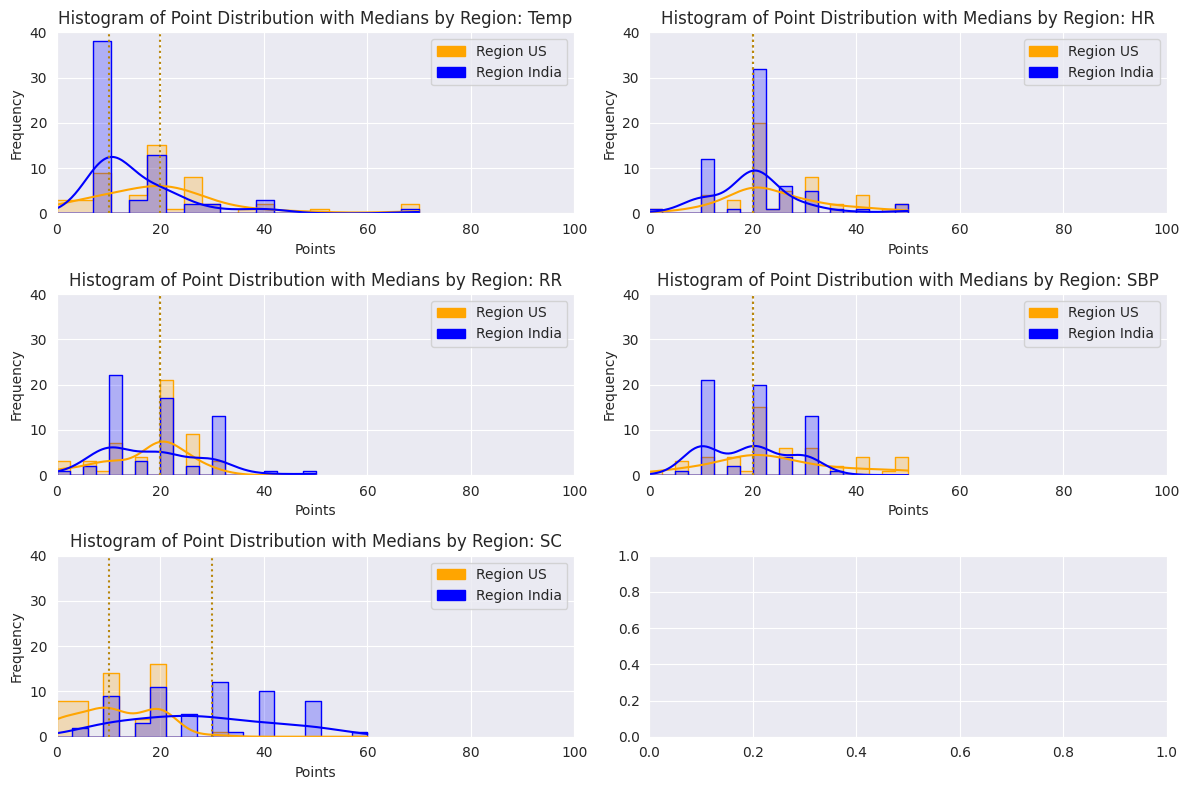

In [ ]:
import matplotlib.patches as mpatches

# Get unique cues
cues = df_MWU_C['Cue'].unique()
num_cues = len(cues)

# Calculate the number of rows and columns for the subplots
num_cols = 2  # You can adjust this if needed
num_rows = math.ceil(num_cues / num_cols)

# Create a figure with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for each cue
for i, cue in enumerate(cues):
    # Filter data for the current cue
    df_cue = df_MWU_C[df_MWU_C['Cue'] == cue]

    # Create the histogram on the current subplot
    sns.histplot(data=df_cue, x='Value', hue='Region', bins=20,
                 kde=True, element='step', ax=axes[i], palette={'US': 'orange', 'India': 'blue'})

    axes[i].set_title(f'Histogram of Point Distribution with Medians by Region: {cue}')
    axes[i].set_xlabel('Points')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Set x and y limits
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 40)

    # Calculate and plot median for KDE by group
    for group in df_cue['Region'].unique():
        group_data = df_cue[df_cue['Region'] == group]['Value']
        # kde_line = sns.kdeplot(group_data, ax=axes[i], color='#b8860b', linestyle='--')
        median = np.median(group_data)
        axes[i].axvline(median, color='#b8860b', linestyle=':')
    # axes[i].legend()

    # Create legend handles and labels manually
    us_patch = mpatches.Patch(color='orange', label='Region US')
    india_patch = mpatches.Patch(color='blue', label='Region India')

    # Add legend using handles and labels
    axes[i].legend(handles=[us_patch, india_patch])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
path2 = "/content/drive/MyDrive/Data/MWU_T.xlsx"
df_MWU_T = pd.read_excel(path2)
df_MWU_T.head(3)

,Market,Cue,Stat,Value
0,India,Temp,Points,15
1,India,Temp,Points,20
2,India,Temp,Points,20


In [ ]:
df_MWU_T.rename(columns={"Market": "Region"}, inplace = True)
df_MWU_T.head(3)
print(df_MWU_T['Cue'].unique())

['Temp' 'HR' 'RR' 'SBP' 'SC' 'RI']


<ipython-input-23-2c419aec7e5c>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-23-2c419aec7e5c>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-23-2c419aec7e5c>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-23-2c419aec7e5c>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
<ipython-input-23-2c419aec7e5c>:27: UserWarning: No artists with labels found to put in legend.  Not

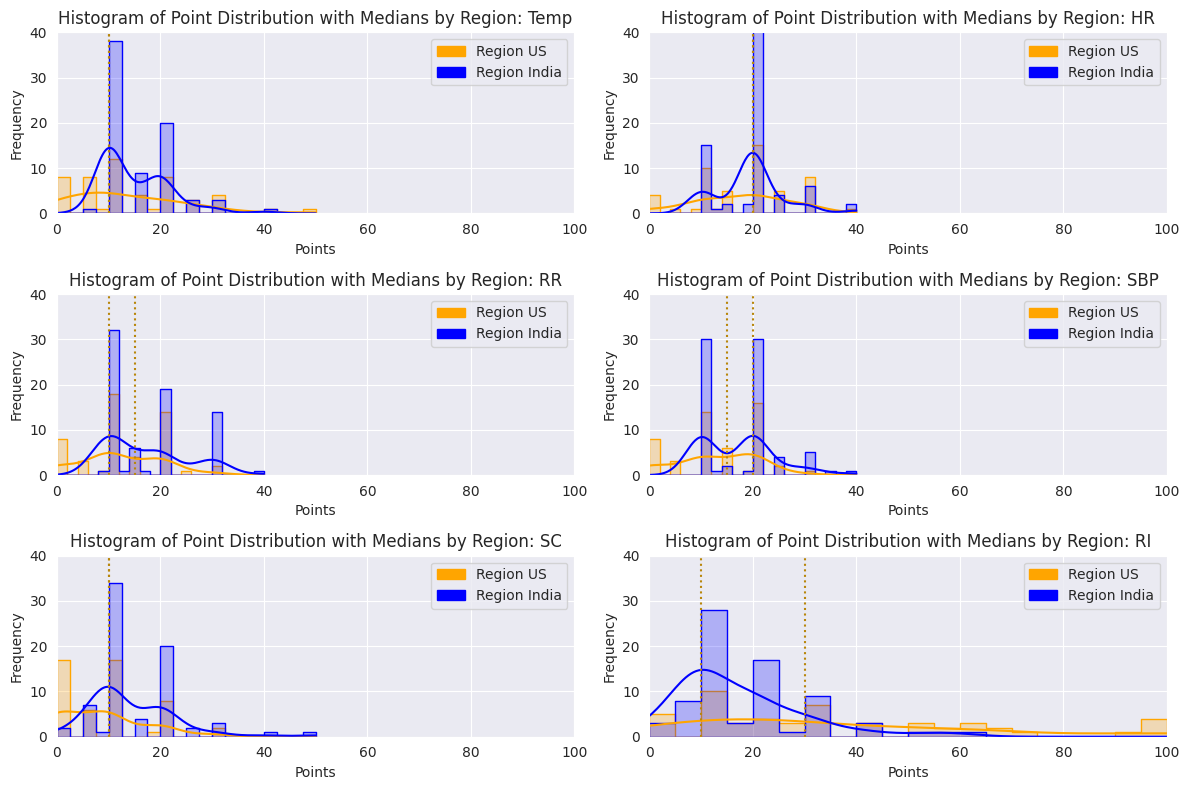

In [ ]:
# Get unique cues
cues = df_MWU_T['Cue'].unique()
num_cues = len(cues)

# Calculate the number of rows and columns for the subplots
num_cols = 2  # You can adjust this if needed
num_rows = math.ceil(num_cues / num_cols)

# Create a figure with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for each cue
for i, cue in enumerate(cues):
    # Filter data for the current cue
    df_cue = df_MWU_T[df_MWU_T['Cue'] == cue]

    # Create the histogram on the current subplot
    sns.histplot(data=df_cue, x='Value', hue='Region', bins=20,
                 kde=True, element='step', ax=axes[i], palette={'US': 'orange', 'India': 'blue'})

    axes[i].set_title(f'Histogram of Point Distribution with Medians by Region: {cue}')
    axes[i].set_xlabel('Points')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Set x and y limits
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 40)

    # Calculate and plot median for KDE by group
    for group in df_cue['Region'].unique():
        group_data = df_cue[df_cue['Region'] == group]['Value']
        # kde_line = sns.kdeplot(group_data, ax=axes[i], color='#b8860b', linestyle='--')
        median = np.median(group_data)
        axes[i].axvline(median, color='#b8860b', linestyle=':')
    # axes[i].legend()

    # Create legend handles and labels manually
    us_patch = mpatches.Patch(color='orange', label='Region US')
    india_patch = mpatches.Patch(color='blue', label='Region India')

    # Add legend using handles and labels
    axes[i].legend(handles=[us_patch, india_patch])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

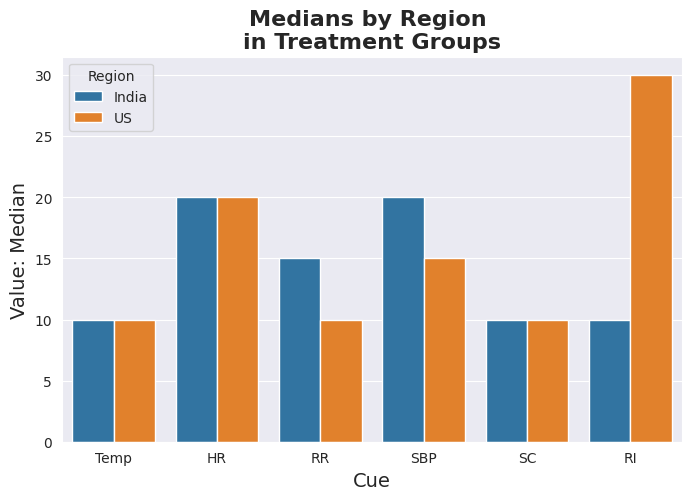

In [ ]:
# Plot the bar chart of the medians by group for each cue.
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
medians_by_group = df_MWU_T.groupby(['Cue', 'Region'])['Value'].median().reset_index()
order = ["Temp", "HR", "RR", "SBP", "SC", "RI"]
# std_dev_by_group = df_MWU_C.groupby(['Cue', 'Group'])['Value'].std().reset_index()

# Add standard deviation annotations
# for bar, std_dev in zip(ax.containers, std_dev_by_group['Value']):
#     # Get the x and y coordinates of the bar
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height()

    # Annotate with standard deviation
    # ax.text(x, y + std_dev + 1, f"SD: {std_dev:.2f}", ha='center', va='bottom', fontsize=10)

ax = sns.barplot(x="Cue", y="Value", hue="Region", data = medians_by_group, palette="tab10", order = order)
ax.set_title("Medians by Region \nin Treatment Groups", fontsize=16, fontweight='bold')
ax.set_xlabel("Cue", fontsize=14)
ax.set_ylabel("Value: Median", fontsize=14)

plt.show()

In [ ]:
medians_by_group

,Cue,Region,Value
0,HR,India,20.0
1,HR,US,20.0
2,RI,India,10.0
3,RI,US,30.0
4,RR,India,15.0
5,RR,US,10.0
6,SBP,India,20.0
7,SBP,US,15.0
8,SC,India,10.0
9,SC,US,10.0


In [ ]:
# Perform the test and construct CI (95%) for true group median differences by group for each cue.

def bootstrap_ci(data1, data2, n_iterations=1000, alpha=0.05):
    """Calculate bootstrap CI for Mann-Whitney U test."""
    diffs = []  # Store median differences

    # Convert to NumPy arrays for compatibility
    data1 = data1.to_numpy()
    data2 = data2.to_numpy()

    for _ in range(n_iterations):
        # Resample with replacement
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)

        # Calculate difference in medians
        diff = np.median(sample1) - np.median(sample2)
        diffs.append(diff)

    # Calculate confidence interval
    lower = np.percentile(diffs, (alpha / 2) * 100)
    upper = np.percentile(diffs, (1 - alpha / 2) * 100)

    return lower, upper

cues = df_MWU_T['Cue'].unique()

for cue in cues:
    # Filter data for each cue
    US = df_MWU_T[(df_MWU_T['Cue'] == cue) & (df_MWU_T['Region'] == 'US')]['Value']
    India = df_MWU_T[(df_MWU_T['Cue'] == cue) & (df_MWU_T['Region'] == 'India')]['Value']

    # Perform Mann-Whitney U Test
    stat, p = mannwhitneyu(US, India, alternative='two-sided')

    # Compute 95% CI via bootstrapping
    lower_ci, upper_ci = bootstrap_ci(US, India)

    # Print results
    print(f"\n\033[1mCue: {cue}\033[0m")  # Bold text for cue name
    print(f"Mann-Whitney U Statistic: {stat:.2f}")
    print(f"P-value: {p:.2f}")
    print(f"Confidence Interval (95%): ({lower_ci:.2f}, {upper_ci:.2f})")
    print("-" * 40) # Separator


Cue: Temp
Mann-Whitney U Statistic: 1577.00
P-value: 0.08
Confidence Interval (95%): (-5.00, 5.00)
----------------------------------------

Cue: HR
Mann-Whitney U Statistic: 1757.50
P-value: 0.42
Confidence Interval (95%): (-5.00, 0.00)
----------------------------------------

Cue: RR
Mann-Whitney U Statistic: 1355.00
P-value: 0.00
Confidence Interval (95%): (-10.00, 0.00)
----------------------------------------

Cue: SBP
Mann-Whitney U Statistic: 1422.00
P-value: 0.01
Confidence Interval (95%): (-10.00, 3.00)
----------------------------------------

Cue: SC
Mann-Whitney U Statistic: 1165.00
P-value: 0.00
Confidence Interval (95%): (-6.05, 0.00)
----------------------------------------

Cue: RI
Mann-Whitney U Statistic: 2612.50
P-value: 0.00
Confidence Interval (95%): (4.00, 25.00)
----------------------------------------
